## Environment setup

### Data

In [3]:
#! mkdir -p ../data/sets/nuscenes  # Make the directory to store the nuScenes dataset in.

#! wget https://www.nuscenes.org/data/v1.0-mini.tgz -P ../data/sets/nuscenes # Download the nuScenes mini split.

#! tar -xf ../data/sets/nuscenes/v1.0-mini.tgz -C ../data/sets/nuscenes  # Uncompress the nuScenes mini split.

### Packages

In [2]:
! pip install opencv-python>=4.5.4.58 --quiet
! pip install nuscenes-devkit --quiet

In [2]:
%matplotlib inline
from nuscenes.nuscenes import NuScenes
import matplotlib.pyplot as plt

### Global variables

In [3]:
nusc = NuScenes(version='v1.0-mini', dataroot='../data/sets/nuscenes', verbose=True)

Loading NuScenes tables for version v1.0-mini...
23 category,
8 attribute,
4 visibility,
911 instance,
12 sensor,
120 calibrated_sensor,
31206 ego_pose,
8 log,
10 scene,
404 sample,
31206 sample_data,
18538 sample_annotation,
4 map,
Done loading in 0.808 seconds.
Reverse indexing ...
Done reverse indexing in 0.1 seconds.


## Main program

In [55]:
# all scenes available in this portion of nuScenes dataset:
nusc.list_scenes()

scene-0061, Parked truck, construction, intersectio... [18-07-24 03:28:47]   19s, singapore-onenorth, #anns:4622
scene-0103, Many peds right, wait for turning car, ... [18-08-01 19:26:43]   19s, boston-seaport, #anns:2046
scene-0655, Parking lot, parked cars, jaywalker, be... [18-08-27 15:51:32]   20s, boston-seaport, #anns:2332
scene-0553, Wait at intersection, bicycle, large tr... [18-08-28 20:48:16]   20s, boston-seaport, #anns:1950
scene-0757, Arrive at busy intersection, bus, wait ... [18-08-30 19:25:08]   20s, boston-seaport, #anns:592
scene-0796, Scooter, peds on sidewalk, bus, cars, t... [18-10-02 02:52:24]   20s, singapore-queensto, #anns:708
scene-0916, Parking lot, bicycle rack, parked bicyc... [18-10-08 07:37:13]   20s, singapore-queensto, #anns:2387
scene-1077, Night, big street, bus stop, high speed... [18-11-21 11:39:27]   20s, singapore-hollandv, #anns:890
scene-1094, Night, after rain, many peds, PMD, ped ... [18-11-21 11:47:27]   19s, singapore-hollandv, #anns:1762
sc

The code beow selects the fist scene, which is a Python dictionary and contains a name, description, as well as the number of samples (i.e., annotated keyframe of the scene at a given timestamp) and the tokens from first and last samples from the scene.

In [6]:
# selecting the first scene:
my_scene = nusc.scene[0]
print(type(my_scene))
my_scene

<class 'dict'>


{'token': 'cc8c0bf57f984915a77078b10eb33198',
 'log_token': '7e25a2c8ea1f41c5b0da1e69ecfa71a2',
 'nbr_samples': 39,
 'first_sample_token': 'ca9a282c9e77460f8360f564131a8af5',
 'last_sample_token': 'ed5fc18c31904f96a8f0dbb99ff069c0',
 'name': 'scene-0061',
 'description': 'Parked truck, construction, intersection, turn left, following a van'}

In [7]:
# retrieving the token from the first sample captured/identified in the scene:
first_sample_token = my_scene['first_sample_token']
first_sample_token

'ca9a282c9e77460f8360f564131a8af5'

The code below retrieves the sample with the selected token. Notice that this sample does not have a previous one, because this is the first sample of the scene. The meaning of the within dictionary `data` and the list `anns` will be explained in another notebook.

In [8]:
my_sample = nusc.get('sample', first_sample_token)
my_sample

{'token': 'ca9a282c9e77460f8360f564131a8af5',
 'timestamp': 1532402927647951,
 'prev': '',
 'next': '39586f9d59004284a7114a68825e8eec',
 'scene_token': 'cc8c0bf57f984915a77078b10eb33198',
 'data': {'RADAR_FRONT': '37091c75b9704e0daa829ba56dfa0906',
  'RADAR_FRONT_LEFT': '11946c1461d14016a322916157da3c7d',
  'RADAR_FRONT_RIGHT': '491209956ee3435a9ec173dad3aaf58b',
  'RADAR_BACK_LEFT': '312aa38d0e3e4f01b3124c523e6f9776',
  'RADAR_BACK_RIGHT': '07b30d5eb6104e79be58eadf94382bc1',
  'LIDAR_TOP': '9d9bf11fb0e144c8b446d54a8a00184f',
  'CAM_FRONT': 'e3d495d4ac534d54b321f50006683844',
  'CAM_FRONT_RIGHT': 'aac7867ebf4f446395d29fbd60b63b3b',
  'CAM_BACK_RIGHT': '79dbb4460a6b40f49f9c150cb118247e',
  'CAM_BACK': '03bea5763f0f4722933508d5999c5fd8',
  'CAM_BACK_LEFT': '43893a033f9c46d4a51b5e08a67a1eb7',
  'CAM_FRONT_LEFT': 'fe5422747a7d4268a4b07fc396707b23'},
 'anns': ['ef63a697930c4b20a6b9791f423351da',
  '6b89da9bf1f84fd6a5fbe1c3b236f809',
  '924ee6ac1fed440a9d9e3720aac635a0',
  '91e3608f55174a319

`list_sample()` lists all `sample_data` and `sample_annotation` associated with the selected sample. While `sample_data` contains the data of the respective timestamp of the scene, `sample_annotation` contains the observed annotations of objects (pedestrians, cars, and others) present iduring that timestamp.

In [40]:
nusc.list_sample(my_sample['token'])

Sample: ca9a282c9e77460f8360f564131a8af5

sample_data_token: 37091c75b9704e0daa829ba56dfa0906, mod: radar, channel: RADAR_FRONT
sample_data_token: 11946c1461d14016a322916157da3c7d, mod: radar, channel: RADAR_FRONT_LEFT
sample_data_token: 491209956ee3435a9ec173dad3aaf58b, mod: radar, channel: RADAR_FRONT_RIGHT
sample_data_token: 312aa38d0e3e4f01b3124c523e6f9776, mod: radar, channel: RADAR_BACK_LEFT
sample_data_token: 07b30d5eb6104e79be58eadf94382bc1, mod: radar, channel: RADAR_BACK_RIGHT
sample_data_token: 9d9bf11fb0e144c8b446d54a8a00184f, mod: lidar, channel: LIDAR_TOP
sample_data_token: e3d495d4ac534d54b321f50006683844, mod: camera, channel: CAM_FRONT
sample_data_token: aac7867ebf4f446395d29fbd60b63b3b, mod: camera, channel: CAM_FRONT_RIGHT
sample_data_token: 79dbb4460a6b40f49f9c150cb118247e, mod: camera, channel: CAM_BACK_RIGHT
sample_data_token: 03bea5763f0f4722933508d5999c5fd8, mod: camera, channel: CAM_BACK
sample_data_token: 43893a033f9c46d4a51b5e08a67a1eb7, mod: camera, channel:

In [9]:
# showing the sample_data field for a specific sensor during the timestamp of the selected scene:
sensor = 'CAM_FRONT'
cam_front_data = nusc.get('sample_data', my_sample['data'][sensor])
cam_front_data

{'token': 'e3d495d4ac534d54b321f50006683844',
 'sample_token': 'ca9a282c9e77460f8360f564131a8af5',
 'ego_pose_token': 'e3d495d4ac534d54b321f50006683844',
 'calibrated_sensor_token': '1d31c729b073425e8e0202c5c6e66ee1',
 'timestamp': 1532402927612460,
 'fileformat': 'jpg',
 'is_key_frame': True,
 'height': 900,
 'width': 1600,
 'filename': 'samples/CAM_FRONT/n015-2018-07-24-11-22-45+0800__CAM_FRONT__1532402927612460.jpg',
 'prev': '',
 'next': '68e8e98cf7b0487baa139df808641db7',
 'sensor_modality': 'camera',
 'channel': 'CAM_FRONT'}

By the use of the token of selected `sample_data`, it is possible to render the captured data:

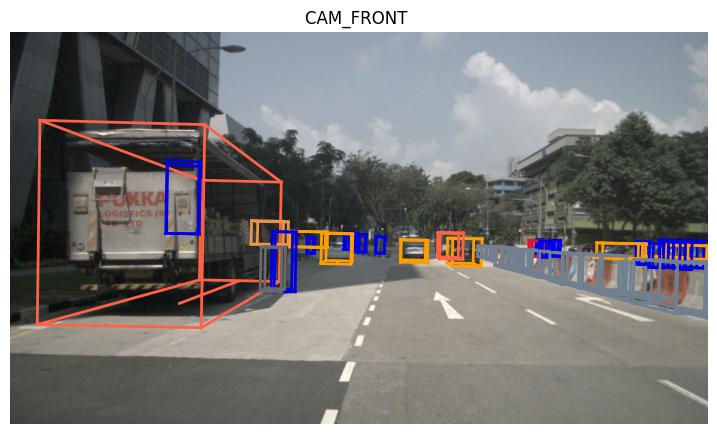

In [10]:
nusc.render_sample_data(cam_front_data['token'])

It is also possible to render data captured from the scene at the same timestamp using other sensors available. For example:

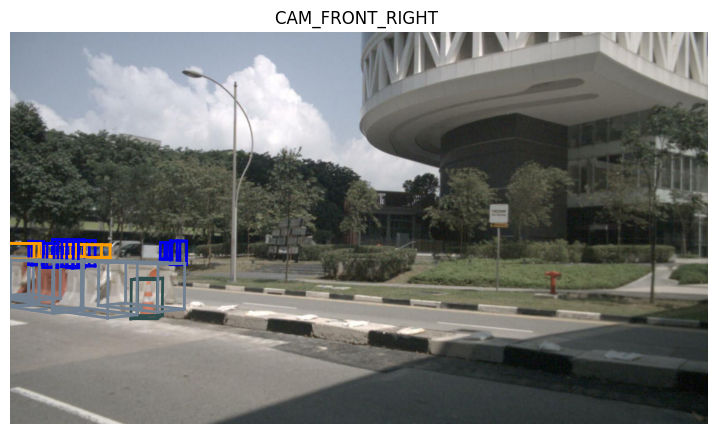

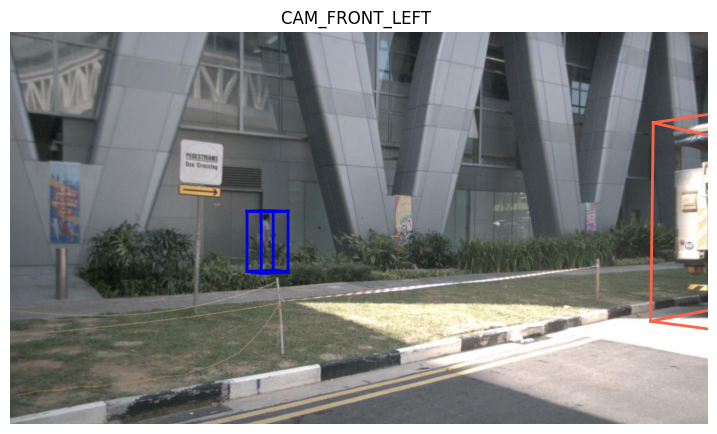

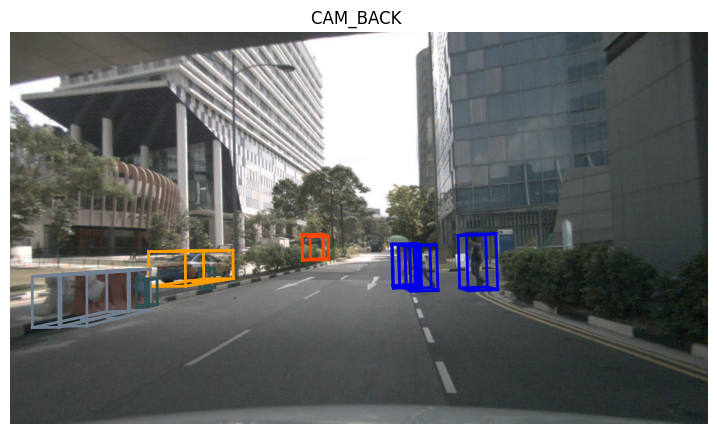

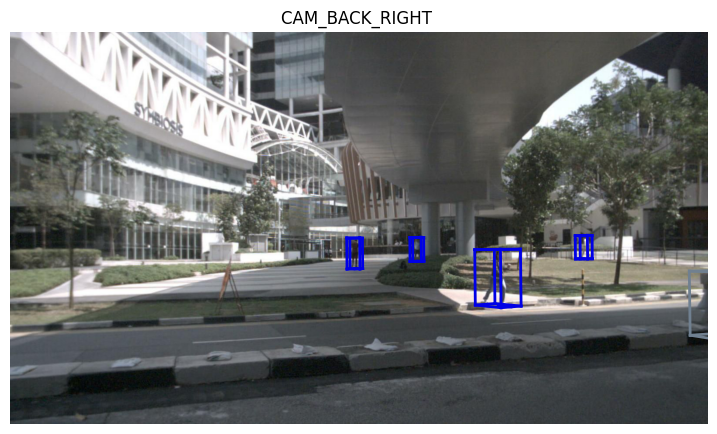

In [65]:
nusc.render_sample_data(nusc.get('sample_data', my_sample['data']['CAM_FRONT_RIGHT'])['token'])
nusc.render_sample_data(nusc.get('sample_data', my_sample['data']['CAM_FRONT_LEFT'])['token'])
nusc.render_sample_data(nusc.get('sample_data', my_sample['data']['CAM_BACK'])['token'])
nusc.render_sample_data(nusc.get('sample_data', my_sample['data']['CAM_BACK_RIGHT'])['token'])

By retrieving a sequence of samples, with the use of `next` token field of each sample, it is possible to render ordered captured keyframes of a scene:

In [70]:
my_sequence = []
token = nusc.get('sample', first_sample_token)
while token['next'] != '':
    my_sequence.append(token['next'])

    token = nusc.get('sample', token['next'])

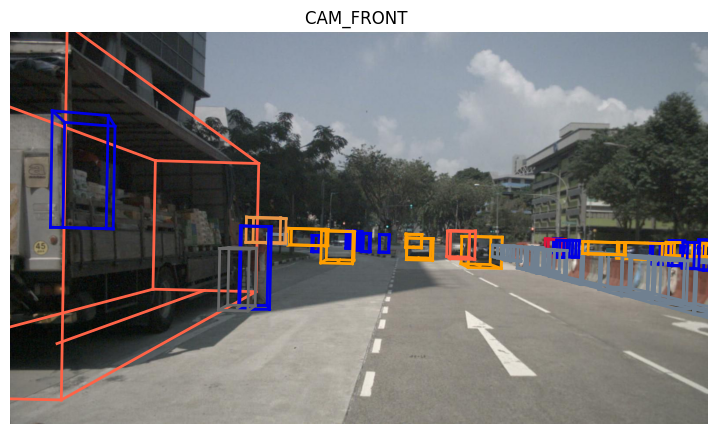

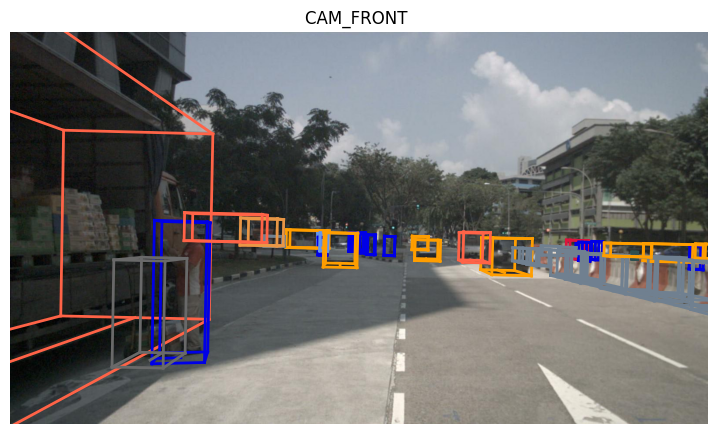

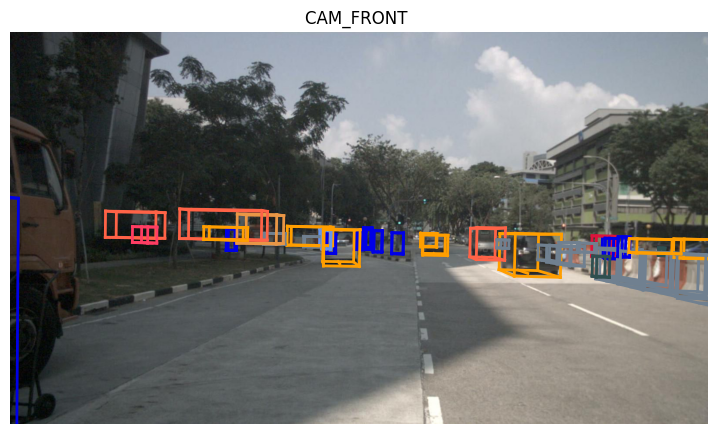

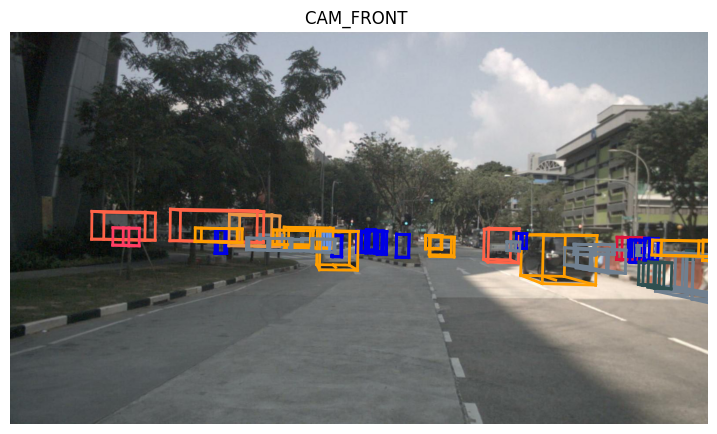

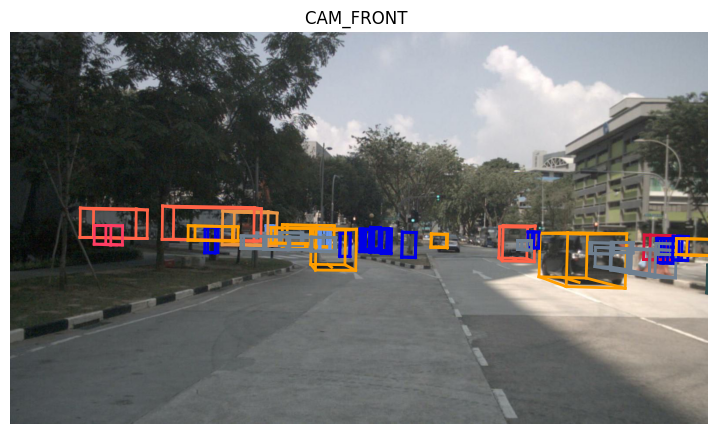

In [71]:
for tok in my_sequence[0:5]:
    sample_aux = nusc.get('sample', tok)
    nusc.render_sample_data(nusc.get('sample_data', sample_aux['data']['CAM_FRONT'])['token'])

If we analize the `anns` field of a sample, we will get the data of an annotated object (pedestrian, car, or others) - in other words, bounding box defining the position of an object seen in a sample. Furthermore, we can access it specific description or categorical attributes through the dictionary fields that end with `_token`.

In [11]:
my_annotation_token = my_sample['anns'][18]
my_annotation_metadata =  nusc.get('sample_annotation', my_annotation_token)
my_annotation_metadata

{'token': '83d881a6b3d94ef3a3bc3b585cc514f8',
 'sample_token': 'ca9a282c9e77460f8360f564131a8af5',
 'instance_token': 'e91afa15647c4c4994f19aeb302c7179',
 'visibility_token': '4',
 'attribute_tokens': ['58aa28b1c2a54dc88e169808c07331e3'],
 'translation': [409.989, 1164.099, 1.623],
 'size': [2.877, 10.201, 3.595],
 'rotation': [-0.5828819500503033, 0.0, 0.0, 0.812556848660791],
 'prev': '',
 'next': 'f3721bdfd7ee4fd2a4f94874286df471',
 'num_lidar_pts': 495,
 'num_radar_pts': 13,
 'category_name': 'vehicle.truck'}

We can access more fine-grained information related to the visibility of annotated object:

In [12]:
nusc.get('visibility', my_annotation_metadata['visibility_token'])

{'description': 'visibility of whole object is between 80 and 100%',
 'token': '4',
 'level': 'v80-100'}

Similarly, we can access other attributes:

In [13]:
nusc.get('attribute', my_annotation_metadata['attribute_tokens'][0])

{'token': '58aa28b1c2a54dc88e169808c07331e3',
 'name': 'vehicle.parked',
 'description': 'Vehicle is stationary (usually for longer duration) with no immediate intent to move.'}

Now, let's see the annotated object during the respective timestamp of the scene:

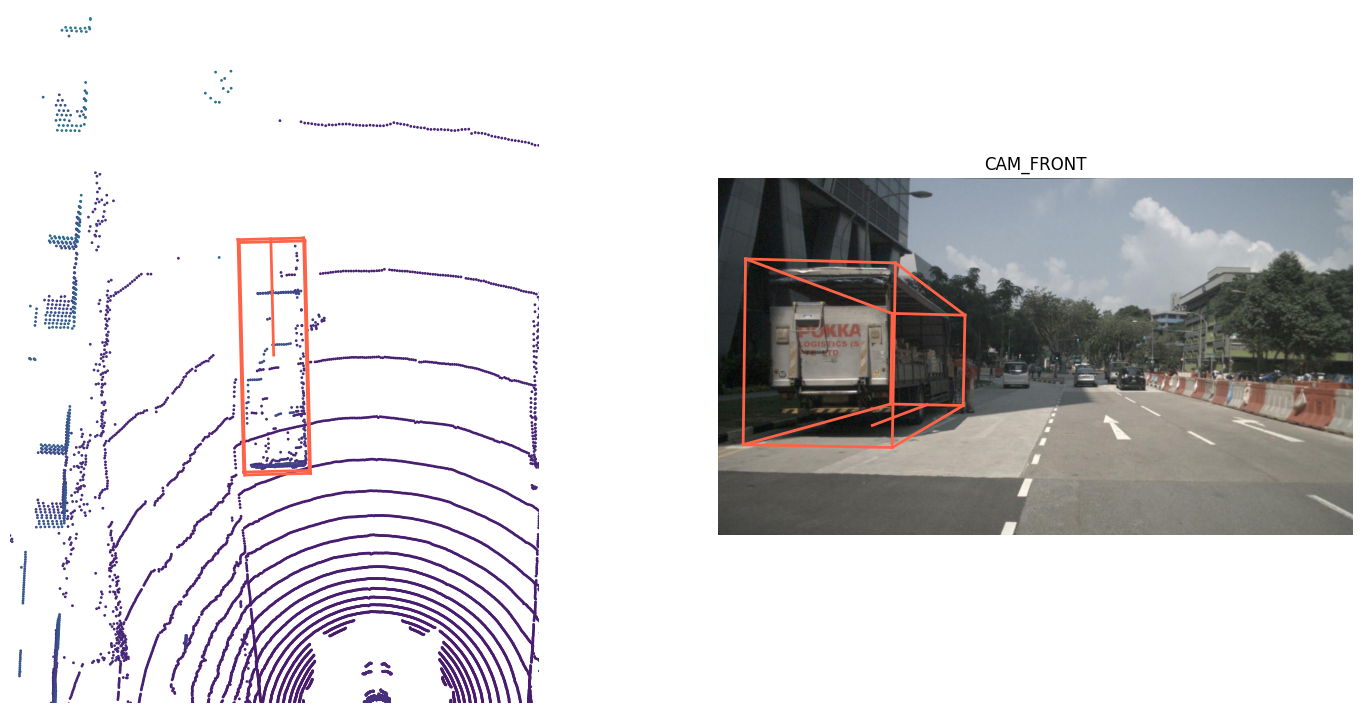

In [74]:
nusc.render_annotation(my_annotation_token)

To check the frequency of observed cateory of annotations present in a sample:

In [81]:
annotated_catgeories = []
for ann in my_sample['anns']:
    annotated_catgeories.append(nusc.get('sample_annotation', ann)['category_name'])

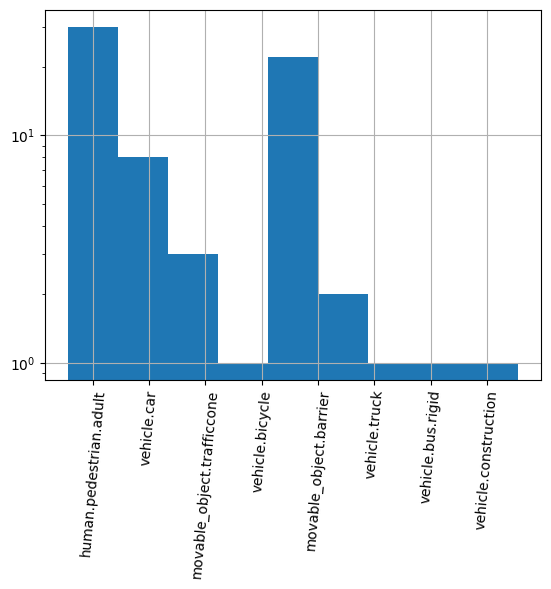

In [99]:
plt.hist(annotated_catgeories, log=True, bins=len(set(annotated_catgeories)), align='left')
plt.grid(True)
plt.xticks(rotation=85)
plt.show()

List of all possible categories of annotations present in nuScenes dataset:

In [33]:
nusc.list_categories()

Category stats for split v1.0-mini:
human.pedestrian.adult      n= 4765, width= 0.68±0.11, len= 0.73±0.17, height= 1.76±0.12, lw_aspect= 1.08±0.23
human.pedestrian.child      n=   46, width= 0.46±0.08, len= 0.45±0.09, height= 1.37±0.06, lw_aspect= 0.97±0.05
human.pedestrian.constructi n=  193, width= 0.69±0.07, len= 0.74±0.12, height= 1.78±0.05, lw_aspect= 1.07±0.16
human.pedestrian.personal_m n=   25, width= 0.83±0.00, len= 1.28±0.00, height= 1.87±0.00, lw_aspect= 1.55±0.00
human.pedestrian.police_off n=   11, width= 0.59±0.00, len= 0.47±0.00, height= 1.81±0.00, lw_aspect= 0.80±0.00
movable_object.barrier      n= 2323, width= 2.32±0.49, len= 0.61±0.11, height= 1.06±0.10, lw_aspect= 0.28±0.09
movable_object.debris       n=   13, width= 0.43±0.00, len= 1.43±0.00, height= 0.46±0.00, lw_aspect= 3.35±0.00
movable_object.pushable_pul n=   82, width= 0.51±0.06, len= 0.79±0.10, height= 1.04±0.20, lw_aspect= 1.55±0.18
movable_object.trafficcone  n= 1378, width= 0.47±0.14, len= 0.45±0.07, heigh

Metadata of a specific nuScenes category:

In [34]:
nusc.category[9]

{'token': 'dfd26f200ade4d24b540184e16050022',
 'name': 'vehicle.motorcycle',
 'description': 'Gasoline or electric powered 2-wheeled vehicle designed to move rapidly (at the speed of standard cars) on the road surface. This category includes all motorcycles, vespas and scooters.'}